# Mutli CLass Image Classifier

## Average Result loss  minimum andhigh accuarcy and predicting  is not good. so that, we move on LeNet

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\abhis

In [2]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) # 32-> is a kernal/filter. (3,3)->Size of each kernal. (64,64,3)->3 dimensional 64 means dimensional(size of the ).AND 3 means RGB

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen

In [5]:
x_train = train_datagen.flow_from_directory('E:/Parent1', target_size = (64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')
x_train


Found 40 images belonging to 4 classes.


In [6]:
x_test = test_datagen.flow_from_directory('E:/Parent1',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
x_test

Found 40 images belonging to 4 classes.


In [7]:
model = classifier.fit_generator(x_train,
                         steps_per_epoch = 250,      
                         epochs = 2,
                         validation_data = x_test,    
                         validation_steps = 50)


Epoch 1/2
250/250 [==============================] - 677s 3s/step - loss: 0.2231 - accuracy: 0.9350 - val_loss: 5.6308e-04 - val_accuracy: 1.0000
Epoch 2/2
250/250 [==============================] - 688s 3s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 8.8075e-05 - val_accuracy: 1.0000


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
_________________________________________________________________


In [9]:
classifier.save("Multiple Class Image.h5")
print("Saved model to disk")

Saved model to disk


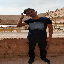

In [10]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Negi\Desktop\Pic\IMG-20190620-WA0030.jpg', target_size = (64, 64))
test_image

In [11]:
test_image = image.img_to_array(test_image)
test_image

array([[[223., 236., 244.],
        [222., 235., 243.],
        [222., 235., 243.],
        ...,
        [208., 216., 219.],
        [208., 215., 221.],
        [209., 214., 220.]],

       [[221., 234., 240.],
        [219., 234., 241.],
        [218., 233., 240.],
        ...,
        [210., 220., 222.],
        [207., 218., 222.],
        [208., 215., 221.]],

       [[220., 233., 241.],
        [218., 233., 240.],
        [219., 232., 238.],
        ...,
        [211., 221., 223.],
        [211., 220., 225.],
        [215., 220., 224.]],

       ...,

       [[108.,  69.,  52.],
        [108.,  72.,  56.],
        [ 99.,  63.,  47.],
        ...,
        [110.,  78.,  63.],
        [116.,  83.,  68.],
        [108.,  76.,  63.]],

       [[112.,  76.,  60.],
        [118.,  82.,  68.],
        [116.,  80.,  64.],
        ...,
        [125.,  86.,  69.],
        [120.,  83.,  67.],
        [110.,  73.,  55.]],

       [[117.,  75.,  63.],
        [108.,  70.,  57.],
        [118.,  

In [12]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[223., 236., 244.],
         [222., 235., 243.],
         [222., 235., 243.],
         ...,
         [208., 216., 219.],
         [208., 215., 221.],
         [209., 214., 220.]],

        [[221., 234., 240.],
         [219., 234., 241.],
         [218., 233., 240.],
         ...,
         [210., 220., 222.],
         [207., 218., 222.],
         [208., 215., 221.]],

        [[220., 233., 241.],
         [218., 233., 240.],
         [219., 232., 238.],
         ...,
         [211., 221., 223.],
         [211., 220., 225.],
         [215., 220., 224.]],

        ...,

        [[108.,  69.,  52.],
         [108.,  72.,  56.],
         [ 99.,  63.,  47.],
         ...,
         [110.,  78.,  63.],
         [116.,  83.,  68.],
         [108.,  76.,  63.]],

        [[112.,  76.,  60.],
         [118.,  82.,  68.],
         [116.,  80.,  64.],
         ...,
         [125.,  86.,  69.],
         [120.,  83.,  67.],
         [110.,  73.,  55.]],

        [[117.,  75.,  63.],
       

In [13]:
from keras.models import load_model
model=load_model('Multiple Class Image.h5')
result= model.predict(test_image)
result

array([[0., 0., 0., 1.]], dtype=float32)

In [14]:
score = model.evaluate(x_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 4s 2s/step
Test Loss: 0.0001387142256135121
Test accuracy: 1.0


In [16]:
x_train.class_indices

{'Abhishek Negi': 0, 'Chennu': 1, 'Dorami': 2, 'Rinki': 3}

In [19]:
if result[0][0] == 1:
    prediction = 'Abhishek Negi'
    print(prediction)
elif result[0][1]==1:
    prediction = 'Cheenu'
    print(prediction)
elif result[0][2]==1:
    prediction = 'Dorami'
    print(prediction)
elif result[0][3]==1:
    prediction = 'Rinki'
    print(prediction)
else:
    print('Not Predicted')

Rinki
